In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
%matplotlib inline
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import decimal
import datetime as dt

['new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths']
Epoch: 100/300| Avg loss: 1.02206
Epoch: 200/300| Avg loss: 1.02206
Epoch: 300/300| Avg loss: 1.02206
w =  [0.02717009] bias =  -0.005709522
Epoch: 100/300| Avg loss: 0.92419
Epoch: 200/300| Avg loss: 0.92419
Epoch: 300/300| Avg loss: 0.92419
w =  [ 0.04500439 -0.3550382 ] bias =  0.3403877
Epoch: 100/300| Avg loss: 0.93741
Epoch: 200/300| Avg loss: 0.93742
Epoch: 300/300| Avg loss: 0.93742
w =  [ 0.05310465 -0.3367919  -0.01432569] bias =  0.33572543
Epoch: 100/300| Avg loss: 0.94588
Epoch: 200/300| Avg loss: 0.94424
Epoch: 300/300| Avg loss: 0.94439
w =  [ 0.03947826 -0.5887426  -0.00752991  0.10242557] bias =  0.40952614
Epoch: 100/300| Avg loss: 0.65756
Epoch: 200/300| Avg loss: 0.53885
Epoch: 300/300| Avg loss: 0.49487
w =  [ 1.7240093  -0.5673188  -2.682456    0.08511218  0.82098925] bias =  0.42428604
Epoch: 100/300| Avg loss: 0.66410
Epoch: 200/300| A

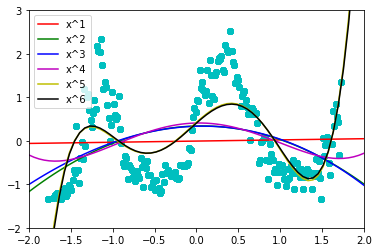

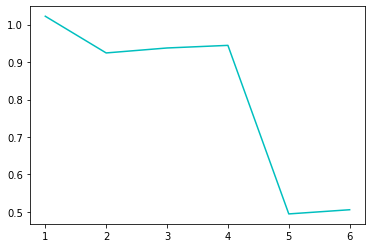

In [ ]:
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)

colors = [None, 'r', 'g', 'b', 'm', 'y', 'k']

df = pd.read_csv('full_data.csv')
df = df[df.location == "Serbia"]
df = df.loc[(df['date'] <= '2020-10-21')]
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)

params = [val for val in df.columns.values if val !='date' and val !='location']
print(params)


tf.reset_default_graph()

max_features = 6
plot2_x = []
plot2_y = []
for nb_features in range(1, max_features + 1):
  y = df['new_cases'].to_numpy()
  nb_samples = len(y)
  x = df['date'].to_numpy()

  x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
  y = (y - np.mean(y)) / np.std(y)
  plt.scatter(x, y, color='c')
  x = create_feature_matrix(x, nb_features)

  X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
  Y = tf.placeholder(shape=(None), dtype=tf.float32)
  w = tf.Variable(tf.zeros(nb_features))
  bias = tf.Variable(0.0)

  w_col = tf.reshape(w, (nb_features, 1))
  hyp = tf.add(tf.matmul(X, w_col), bias)
  Y_col = tf.reshape(Y, (-1, 1))

  loss = tf.reduce_mean(tf.square(hyp - Y))
  opt_op = tf.train.AdamOptimizer().minimize(loss)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    nb_epochs = 300
    epoch_loss = 0
    for epoch in range(nb_epochs):
      for sample in range(nb_samples):
        feed = {X: x[sample].reshape((1, nb_features)), 
                Y: y[sample]}
        _, curr_loss = sess.run([opt_op, loss], feed_dict=feed)
        epoch_loss += curr_loss
      epoch_loss /= nb_samples
      if (epoch + 1) % 100 == 0:
        print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                                epoch_loss))
        
    plot2_x.append(nb_features)
    plot2_y.append(epoch_loss)
    w_val = sess.run(w)
    bias_val = sess.run(bias)
    print('w = ', w_val, 'bias = ', bias_val)
    xs = create_feature_matrix(np.linspace(-2, 4, 100), nb_features)
    hyp_val = sess.run(hyp, feed_dict={X: xs})
    plt.plot(xs[:, 0].tolist(), hyp_val.tolist(), color=colors[nb_features], label='x^{}'.format(nb_features))
    plt.xlim([-2, 2])
    plt.ylim([-2, 3])
plt.legend(loc="upper left")
plt.show()
plt.plot(plot2_x, plot2_y, color='c')
plt.show()

# Iz datih grafika mozemo da primetimo da kako raste stepen funkcije u pocetku, mnogo lakse mozemo da 'fitujemo' podacima.
# Mozemo takodje da primetimo da funkcija sa stepenom 6 ima veci loss od funcije sa stepenom 5, 
# sto znaci da je funkcija sa stepenom 5 bolji kandidat za ucenje i da je vise prilagodjiva nasim podacima
# nego funkcija sa stepenom 6.